In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as mp
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re as r
from nltk.stem import PorterStemmer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/Projects/Combined Data.csv')

In [ ]:




df1 = data.copy()

In [ ]:
df1

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [ ]:

df1.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:

df1.dropna(inplace=True)

In [ ]:

df1.isnull().sum()

,0
statement,0
status,0


In [ ]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
stopwords.words('english')
ps = PorterStemmer()

In [ ]:



def preprocess_and_transform_text(text):
    # Preprocessing steps
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers
    text = re.sub(r'\b\d{1,3}[MF]\b', '', text)  # Remove 'MF' numbers

    # Convert to lowercase and tokenize
    text = text.lower()
    text = nltk.word_tokenize(text)

    # Remove stopwords and alphanumeric words
    text = [i for i in text if i.isalnum() and i not in stopwords.words('english')]

    # Stemming
    text = [ps.stem(i) for i in text]

    return " ".join(text)

In [ ]:



nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

import nltk

# Load the Punkt sentence tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

sentences = []  # To store tokenized and cleaned sentences
total_sentences = 0

# Iterate through reviews in the dataframe
for review in df1['statement']:
    # Split the review into sentences
    sents = tokenizer.tokenize(review.strip())
    total_sentences += len(sents)

    for sent in sents:
        # Clean and split sentences
        cleaned_sent =preprocess_and_transform_text(sent)  # Ensure clean_reviews is defined
        sentences.append(nltk.word_tokenize(cleaned_sent))  # Use word_tokenize for better accuracy

# Print the total number of sentences and processed sentences
print(total_sentences)
print(len(sentences))


330848
330848


In [ ]:



for te in sentences[:5]:
    print(te,"\n")

['oh', 'gosh'] 

['troubl', 'sleep', 'confus', 'mind', 'restless', 'heart'] 

['tune'] 

['wrong', 'back', 'dear', 'forward', 'doubt'] 

['stay', 'restless', 'restless', 'place'] 



In [ ]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
pip install --upgrade numpy scipy pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 79.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account

In [ ]:
pip install --upgrade gensim


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
pip install --upgrade numpy gensim scipy pandas


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)


In [ ]:
pip uninstall numpy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4


In [ ]:
pip install pandas==2.2.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


In [ ]:
pip install numpy --upgrade

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [ ]:

pip install numpy==1.26.4

In [ ]:
import gensim
w2v_model=gensim.models.Word2Vec(sentences=sentences,vector_size=300,window=10,min_count=1)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:




w2v_model.train(sentences,epochs=25,total_examples=len(sentences))

In [ ]:

# Get the total number of words in the vocabulary
vocab_size = len(w2v_model.wv.key_to_index)
print("The total number of words are:", vocab_size)

In [ ]:


# Extract the vocabulary
vocab = list(w2v_model.wv.key_to_index.keys())

# Create a dictionary to store word vectors
word_vec_dict = {}
for word in vocab:
    word_vec_dict[word] = w2v_model.wv[word]  # Direct indexing for the vector

print("The number of key-value pairs:", len(word_vec_dict))
# should come equal to vocab size

In [ ]:




# cleaning reviews.
df1['clean_statement']=df1['statement'].apply(preprocess_and_transform_text)

In [ ]:






# now since we will have to pad we need to find the maximum lenght of any document.

maxi=-1
for i,rev in enumerate(df1['clean_statement']):
    tokens=rev.split()
    if(len(tokens)>maxi):
        maxi=len(tokens)
print(maxi)


In [ ]:
# Now we integer encode the words in the reviews using Keras tokenizer.

# Note that there two important variables:
# which are the vocab_size which is the total no of unique words
# while the second is max_doc_len which is the length of every document after padding.
# Both of these are required by the Keras embedding layer.

In [ ]:

pip install --upgrade numpy





In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer
tok = Tokenizer()
tok.fit_on_texts(df1['clean_statement'])
vocab_size = len(tok.word_index) + 1
encd_rev = tok.texts_to_sequences(df1['clean_statement'])

In [ ]:

max_rev_len=2520  # max lenght of a review
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim=300 # embedding dimension as choosen in word2vec constructor

In [ ]:


# now padding to have a amximum length
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_rev= pad_sequences(encd_rev, maxlen=max_rev_len, padding='post')
pad_rev.shape

In [ ]:

# we need to pass the w2v word embeddings to the embedding layer in Keras.
#The embedding matrix will be of dimensions (vocab_size,embed_dim)
#where the word_index of each word from keras tokenizer is its index into the matrix and the corressponding entry is its w2v vector
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector

In [ ]:

print(embed_matrix[14])

In [ ]:

y=df1['status']

In [ ]:



import pandas as pd
from sklearn.preprocessing import LabelEncoder
import keras
label_encoder = LabelEncoder()
y_en = label_encoder.fit_transform(y)
Y= keras.utils.to_categorical(y_en)

print(Y)



In [ ]:



unique_values = np.unique(Y, axis=0)

# To count occurrences of each unique row
counts = np.array([np.sum(np.all(Y == unique, axis=1)) for unique in unique_values])

print("Unique values:")
print(unique_values)
print("Counts of each unique value:")
print(counts)

In [ ]:





import numpy as np

# Assuming Y is the one-hot encoded target
# If you want to see the unique class labels in the one-hot encoded array

# For the one-hot encoded labels
unique_labels = np.unique(np.argmax(Y, axis=1))  # Convert one-hot back to the original class indices

print("Unique values of Y:", unique_labels)


In [ ]:
Y

In [ ]:




pad_rev

In [ ]:



# Split the dataset into training and testing sets
y_int = np.argmax(Y, axis=1)

x_train, x_test, y_train, y_test = train_test_split(pad_rev, Y, test_size=0.20, random_state=123,stratify=y_int)

# Now you can use x_train, x_test, y_train, and y_test for training and evaluation

NameError: name 'Y' is not defined

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# # Calculate new class weights to address imbalanced target variable 'status'
# from sklearn.utils.class_weight import compute_class_weight
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weight_dict = dict(enumerate(class_weights))



In [ ]:
Y

In [ ]:
y_train

In [ ]:
y_int

In [ ]:
# import numpy as np

# # Assuming y_int is your array
# unique_values, counts = np.unique(y_int, return_counts=True)

# # Print unique values and their counts
# for value, count in zip(unique_values, counts):
#     print(f"Class {value}: {count} instances")

# # If you want it as a dictionary
# class_distribution = dict(zip(unique_values, counts))
# print("Class Distribution:", class_distribution)


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

In [ ]:



y_int1 = np.argmax(y_train, axis=1)
class_weights1 = compute_class_weight('balanced', classes=np.unique(y_int1), y=y_int1)
class_weight_dict1 = {i: class_weights1[i] for i in range(len(class_weights1))}

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='bigru_best_model.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)

model_bigru = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
    Bidirectional(GRU(48, return_sequences=False)),
    Dropout(0.3),
    Dense(48, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

model_bigru.compile(optimizer=Adam(learning_rate=1e-05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_bigru.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint_callback],
    class_weight=class_weight_dict1,
    verbose=1
)

# Mark the end of the W&B run


In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy =history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model_bigru.summary()

In [ ]:
import numpy as np

# Get the epoch with the highest validation accuracy
best_epoch1 = np.argmax(history.history['val_accuracy']) + 1  # Adding 1 since epochs start from 1
best_val_acc1 = np.max(history.history['val_accuracy'])

print(f"Best epoch: {best_epoch1}, Best validation accuracy: {best_val_acc1:.4f}")

# Get predictions (probabilities)
y_pred_probs2 =model_bigru.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs2, axis=1)  # Assuming one-hot encoded output

# Convert y_test from one-hot to class labels
y_true = np.argmax(y_test, axis=1)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

### BIGRU with 50 epochs

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',  # Monitor validation loss
                               patience=7,
                               restore_best_weights=True)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

model_bigru_word2vec_tuned = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
    Bidirectional(GRU(32, return_sequences=False,kernel_regularizer='l2')),
    Dropout(0.5),
    Dense(64, activation='relu',kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

model_bigru_word2vec_tuned.compile(optimizer=Adam(learning_rate=1e-05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_bigru_word2vec_tuned.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    class_weight=class_weight_dict1,
    verbose=1
)

# Mark the end of the W&B run


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.1516 - loss: 5.4691 - val_accuracy: 0.1608 - val_loss: 5.0102
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 194s 129ms/step - accuracy: 0.1583 - loss: 4.9603 - val_accuracy: 0.1841 - val_loss: 4.5755
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 149s 136ms/step - accuracy: 0.1665 - loss: 4.5167 - val_accuracy: 0.2063 - val_loss: 4.2119
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 201s 135ms/step - accuracy: 0.1840 - loss: 4.1918 - val_accuracy: 0.2296 - val_loss: 3.9067
Epoch 5/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 142s 135ms/step - accuracy: 0.1860 - loss: 3.8591 - val_accuracy: 0.2471 - val_loss: 3.6508
Epoch 6/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 203s 135ms/step - accuracy: 0.2013 - loss: 3.6110 - val_accuracy: 0.2649 - val_loss: 3.4382
Epoch 7/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 195s 129ms/step - accuracy: 0.2107 - loss: 3.4492 - val_accuracy: 0.2840 - val_loss: 3.2635
Epoch 8/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - ac

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model_bigru_word2vec_tuned.evaluate(x_test, y_test, verbose=1)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


330/330 ━━━━━━━━━━━━━━━━━━━━ 31s 93ms/step - accuracy: 0.6065 - loss: 1.4351
Test Loss: 1.4168
Test Accuracy: 0.6159


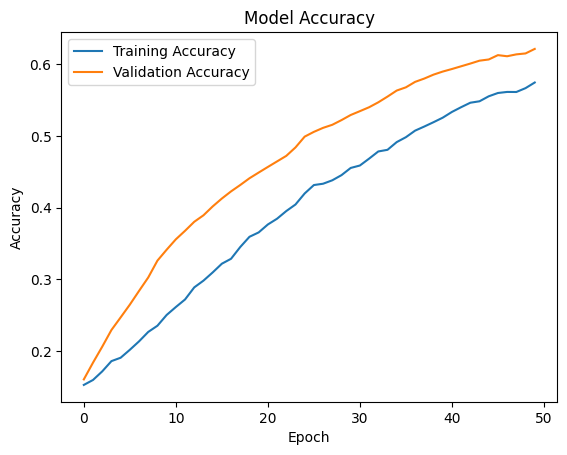

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_bigru_word2vec_tuned.save('model_checkpoint_bigru_tuned.keras')


In [ ]:
from tensorflow.keras.models import load_model
model_bigru_word2vec_tuned = load_model('/content/model_checkpoint_bigru_tuned.keras')


In [ ]:
history.epoch[-1]

49

In [ ]:
model_bigru_word2vec_tuned.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 2520, 300)           │      18,601,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,808,031 (71.75 MB)

 Trainable params: 68,743 (268.53 KB)

 Non-trainable params: 18,601,800 (70.96 MB)

 Optimizer params: 137,488 (537.07 KB)

### Bigru cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Convert the labels to a single column (if using one-hot encoding)
y_labels = np.argmax(y_train, axis=1)  # Assuming y_train is one-hot encoded

# Store validation accuracy for each fold
val_accuracies = []

# Stratified K-fold Cross-Validation
for fold, (train_idx, val_idx) in enumerate(skf.split(x_train, y_labels)):
    print(f"\nProcessing fold {fold + 1}...")

    # Split data into training and validation sets for this fold
    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Define the model
    model_bigru_word2vec_tuned_703 = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embed_dim,
                  input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
        Bidirectional(GRU(32, return_sequences=False, kernel_regularizer='l2')),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(7, activation='softmax')
    ])

    # Compile the model
    model_bigru_word2vec_tuned_703.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )


    # Train the model
    history = model_bigru_word2vec_tuned_703.fit(
        x_train_fold,
        y_train_fold,
        epochs=15,
        batch_size=32,
        validation_data=(x_val_fold, y_val_fold),
        callbacks=[early_stopping],
        class_weight=class_weight_dict1,
        verbose=1
    )

    # Evaluate the model on the validation set
    val_accuracy = model_bigru_word2vec_tuned_703.evaluate(x_val_fold, y_val_fold, verbose=0)[1]
    print(f"Validation accuracy for fold {fold + 1}: {val_accuracy:.4f}")
    val_accuracies.append(val_accuracy)

# Print overall results
mean_val_accuracy = np.mean(val_accuracies)
print(f"\nMean validation accuracy across folds: {mean_val_accuracy:.4f}")



Processing fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 163s 134ms/step - accuracy: 0.1246 - loss: 4.5513 - val_accuracy: 0.3198 - val_loss: 2.9476
Epoch 2/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 198s 134ms/step - accuracy: 0.2740 - loss: 2.7798 - val_accuracy: 0.4391 - val_loss: 2.3786
Epoch 3/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 142s 134ms/step - accuracy: 0.4007 - loss: 2.3008 - val_accuracy: 0.5114 - val_loss: 1.9494
Epoch 4/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 142s 135ms/step - accuracy: 0.4771 - loss: 1.9545 - val_accuracy: 0.5836 - val_loss: 1.5650
Epoch 5/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 135ms/step - accuracy: 0.5541 - loss: 1.7014 - val_accuracy: 0.6052 - val_loss: 1.4300
Epoch 6/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 135ms/step - accuracy: 0.5842 - loss: 1.5326 - val_accuracy: 0.6219 - val_loss: 1.3023
Epoch 7/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 135ms/step - accuracy: 0.6023 - loss: 1.3910 - val_accuracy: 0.6336 - val_loss: 1.2428
Epoch 8/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 135ms/step - ac

### BIGRU with 50 epochs with simple model

In [ ]:
#consider this model 1(use model checkpoints slected)
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='bigru_best_model_mob.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)

# Model definition
bigru_no_earlystopping_mob111 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
    Bidirectional(GRU(64, return_sequences=False, kernel_regularizer='l2')),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    Dense(7, activation='softmax')
])

bigru_no_earlystopping_mob111.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training with checkpoint callback
history_bigru_no_e_mob111 = bigru_no_earlystopping_mob111.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    verbose=1,
    callbacks=[checkpoint_callback]  # Include checkpoint callback
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.2357 - loss: 5.1873
Epoch 1: val_accuracy improved from -inf to 0.47930, saving model to bigru_best_model_mob.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 222s 193ms/step - accuracy: 0.2358 - loss: 5.1862 - val_accuracy: 0.4793 - val_loss: 2.6188
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5425 - loss: 2.3141
Epoch 2: val_accuracy improved from 0.47930 to 0.64148, saving model to bigru_best_model_mob.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 261s 193ms/step - accuracy: 0.5426 - loss: 2.3139 - val_accuracy: 0.6415 - val_loss: 1.6755
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.6566 - loss: 1.6225
Epoch 3: val_accuracy improved from 0.64148 to 0.68217, saving model to bigru_best_model_mob.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 260s 192ms/step - accuracy: 0.6567 - loss: 1.6224 - val_accuracy: 0.6822 - val_loss: 1.4075
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy:

In [ ]:
best_val_acc = max(history_bigru_no_e_mob111.history['val_accuracy'])
print(f"Best Validation Accuracy from Training History: {best_val_acc:.4f}")


Best Validation Accuracy from Training History: 0.7421


In [ ]:
best_train_acc = max(history_bigru_no_e_mob111.history['accuracy'])
print(f"Best training Accuracy from Training History: {best_train_acc:.4f}")

Best training Accuracy from Training History: 0.7981


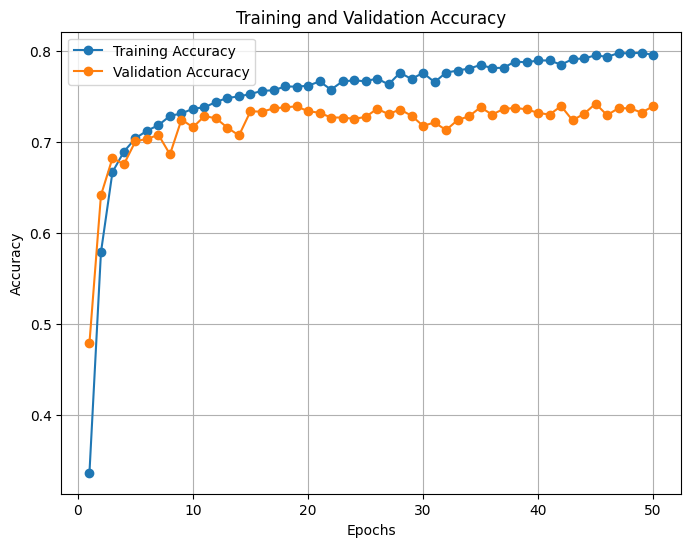

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy =history_bigru_no_e_mob111.history['accuracy']
val_accuracy = history_bigru_no_e_mob111.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('bigru_best_model_mob.keras')


In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred = best_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       768
           1       0.65      0.82      0.72       556
           2       0.77      0.58      0.66      3081
           3       0.93      0.89      0.91      3269
           4       0.46      0.69      0.55       215
           5       0.45      0.67      0.54       517
           6       0.63      0.73      0.68      2131

    accuracy                           0.74     10537
   macro avg       0.66      0.74      0.69     10537
weighted avg       0.76      0.74      0.74     10537



In [ ]:
#consider this model 1(use model checkpoints and dropout) selected
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='bigru_best_model_mob_drop.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)

# Model definition
bigru_mob111_dropout = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
    Bidirectional(GRU(64, return_sequences=False, kernel_regularizer='l2')),
    Dropout(0.1),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    Dropout(0.1),
    Dense(7, activation='softmax')
])

bigru_mob111_dropout.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training with checkpoint callback
history_bigru_no_e_mob111_dropout = bigru_mob111_dropout.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    verbose=1,
    callbacks=[checkpoint_callback]  # Include checkpoint callback
)


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.2018 - loss: 5.2833
Epoch 1: val_accuracy improved from -inf to 0.38534, saving model to bigru_best_model_mob_drop.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 221s 195ms/step - accuracy: 0.2019 - loss: 5.2823 - val_accuracy: 0.3853 - val_loss: 2.8390
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4250 - loss: 2.5465
Epoch 2: val_accuracy improved from 0.38534 to 0.56958, saving model to bigru_best_model_mob_drop.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 265s 198ms/step - accuracy: 0.4250 - loss: 2.5463 - val_accuracy: 0.5696 - val_loss: 1.9144
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5619 - loss: 1.8602
Epoch 3: val_accuracy improved from 0.56958 to 0.63839, saving model to bigru_best_model_mob_drop.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 262s 198ms/step - accuracy: 0.5619 - loss: 1.8601 - val_accuracy: 0.6384 - val_loss: 1.5175
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/s

In [ ]:
import numpy as np

# Get the epoch with the highest validation accuracy
best_epoch = np.argmax(history_bigru_no_e_mob111_dropout.history['val_accuracy']) + 1  # Adding 1 since epochs start from 1
best_val_acc = np.max(history_bigru_no_e_mob111_dropout.history['val_accuracy'])

print(f"Best epoch: {best_epoch}, Best validation accuracy: {best_val_acc:.4f}")


Best epoch: 45, Best validation accuracy: 0.7408


In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model1 = load_model('bigru_best_model_mob_drop.keras')

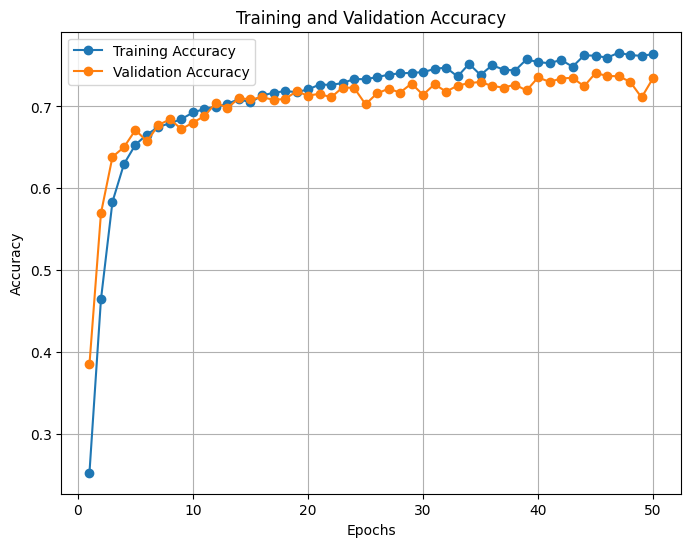

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy =history_bigru_no_e_mob111_dropout.history['accuracy']
val_accuracy = history_bigru_no_e_mob111_dropout.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred = best_model1.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 24s 71ms/step
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       768
           1       0.75      0.75      0.75       556
           2       0.77      0.53      0.63      3081
           3       0.92      0.90      0.91      3269
           4       0.48      0.68      0.56       215
           5       0.44      0.68      0.54       517
           6       0.61      0.75      0.67      2131

    accuracy                           0.73     10537
   macro avg       0.66      0.73      0.69     10537
weighted avg       0.75      0.73      0.73     10537



In [ ]:
best_model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 2520, 300)           │      18,601,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 128)                 │         140,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,029,983 (72.59 MB)

 Trainable params: 142,727 (557.53 KB)

 Non-trainable params: 18,601,800 (70.96 MB)

 Optimizer params: 285,456 (1.09 MB)

#### End


In [ ]:
#consider this model 1(use model checkpoints and train once again(afternoon) and use 0.1 dropouts final(night))
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization


bigru_no_earlystopping_mob11= Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
   Bidirectional(GRU(64, return_sequences=False,kernel_regularizer='l2')),
    # Dropout(0.5),
    Dense(16, activation='relu',kernel_regularizer='l2'),
    # Dropout(0.1),
    Dense(7, activation='softmax')
])
bigru_no_earlystopping_mob11.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_bigru_no_e_mob11 = bigru_no_earlystopping_mob11.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    verbose=1
)




Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 183s 158ms/step - accuracy: 0.2729 - loss: 5.2447 - val_accuracy: 0.4778 - val_loss: 2.6230
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 205s 161ms/step - accuracy: 0.5202 - loss: 2.3752 - val_accuracy: 0.6259 - val_loss: 1.7468
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 170s 161ms/step - accuracy: 0.6299 - loss: 1.6932 - val_accuracy: 0.6433 - val_loss: 1.5244
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 203s 162ms/step - accuracy: 0.6757 - loss: 1.3995 - val_accuracy: 0.6633 - val_loss: 1.3622
Epoch 5/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 162ms/step - accuracy: 0.6844 - loss: 1.2319 - val_accuracy: 0.6877 - val_loss: 1.2383
Epoch 6/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 171s 162ms/step - accuracy: 0.6984 - loss: 1.1313 - val_accuracy: 0.6796 - val_loss: 1.2121
Epoch 7/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 199s 159ms/step - accuracy: 0.7053 - loss: 1.0717 - val_accuracy: 0.7039 - val_loss: 1.1048
Epoch 8/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 203s 160ms/step - ac

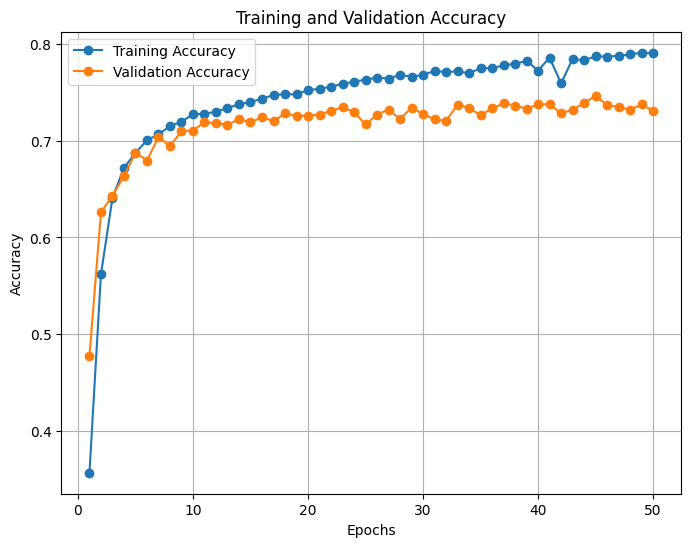

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy =history_bigru_no_e_mob11.history['accuracy']
val_accuracy = history_bigru_no_e_mob11.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred = bigru_no_earlystopping_mob11.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       768
           1       0.59      0.82      0.69       556
           2       0.77      0.53      0.63      3081
           3       0.92      0.90      0.91      3269
           4       0.34      0.73      0.46       215
           5       0.47      0.66      0.55       517
           6       0.64      0.73      0.68      2131

    accuracy                           0.73     10537
   macro avg       0.64      0.74      0.67     10537
weighted avg       0.76      0.73      0.73     10537



### bigru with 50 epochs (no early stopping)

In [ ]:

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization


bigru_no_earlystopping_lr12= Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
   Bidirectional(GRU(32, return_sequences=False,kernel_regularizer=l2(0.02))),
    Dropout(0.1),
    Dense(64, activation='relu',kernel_regularizer=l2(0.02)),
    Dropout(0.1),
    Dense(7, activation='softmax')
])
bigru_no_earlystopping_lr12.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_l2 = bigru_no_earlystopping_lr12.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.3,
    class_weight=class_weight_dict1,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 177s 174ms/step - accuracy: 0.1436 - loss: 6.9990 - val_accuracy: 0.3228 - val_loss: 3.5659
Epoch 2/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 200s 171ms/step - accuracy: 0.3526 - loss: 3.1166 - val_accuracy: 0.5034 - val_loss: 2.2157
Epoch 3/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 156s 169ms/step - accuracy: 0.5121 - loss: 2.1037 - val_accuracy: 0.6314 - val_loss: 1.5764
Epoch 4/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 183s 149ms/step - accuracy: 0.6160 - loss: 1.5885 - val_accuracy: 0.6611 - val_loss: 1.3502
Epoch 5/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 142s 149ms/step - accuracy: 0.6497 - loss: 1.3362 - val_accuracy: 0.6634 - val_loss: 1.2688
Epoch 6/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 157s 170ms/step - accuracy: 0.6518 - loss: 1.2472 - val_accuracy: 0.6694 - val_loss: 1.1979
Epoch 7/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 202s 170ms/step - accuracy: 0.6690 - loss: 1.1535 - val_accuracy: 0.6684 - val_loss: 1.1545
Epoch 8/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 184s 150ms/step - accuracy: 0.6771 -

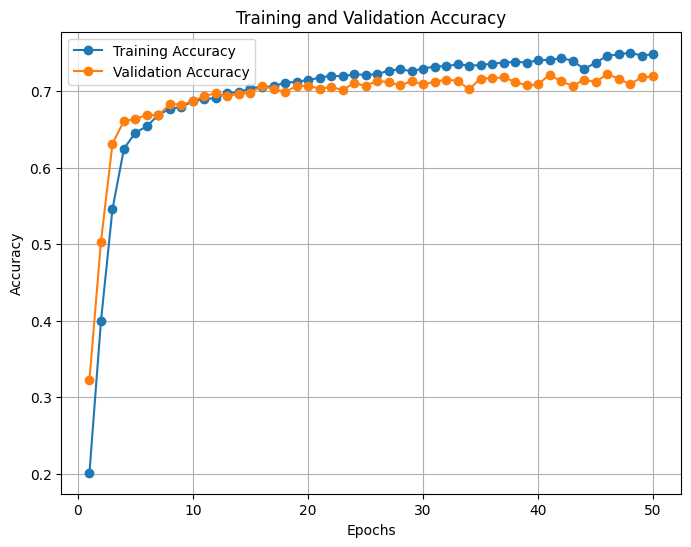

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy =history_l2 .history['accuracy']
val_accuracy = history_l2.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred = bigru_no_earlystopping_lr12.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       768
           1       0.65      0.79      0.72       556
           2       0.76      0.47      0.58      3081
           3       0.92      0.90      0.91      3269
           4       0.39      0.65      0.48       215
           5       0.41      0.66      0.50       517
           6       0.59      0.76      0.66      2131

    accuracy                           0.72     10537
   macro avg       0.63      0.72      0.66     10537
weighted avg       0.74      0.72      0.71     10537



In [ ]:
##### FINAL BIGRU MODEL
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization


bigru_no_earlystopping= Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
   Bidirectional(GRU(32, return_sequences=False,kernel_regularizer='l2')),
    Dropout(0.5),
    Dense(64, activation='relu',kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])
bigru_no_earlystopping.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_bigru_no_e = bigru_no_earlystopping.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    verbose=1
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 160s 131ms/step - accuracy: 0.1906 - loss: 4.6095 - val_accuracy: 0.3331 - val_loss: 2.9944
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 198s 133ms/step - accuracy: 0.2779 - loss: 2.8445 - val_accuracy: 0.4208 - val_loss: 2.4403
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 142s 133ms/step - accuracy: 0.3809 - loss: 2.3931 - val_accuracy: 0.4895 - val_loss: 2.0400
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 147s 138ms/step - accuracy: 0.4466 - loss: 2.0877 - val_accuracy: 0.5718 - val_loss: 1.6496
Epoch 5/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 196s 133ms/step - accuracy: 0.5387 - loss: 1.7557 - val_accuracy: 0.6067 - val_loss: 1.4304
Epoch 6/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 140s 131ms/step - accuracy: 0.5832 - loss: 1.5320 - val_accuracy: 0.6256 - val_loss: 1.3346
Epoch 7/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 144s 133ms/step - accuracy: 0.6114 - loss: 1.4054 - val_accuracy: 0.6405 - val_loss: 1.2109
Epoch 8/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 141s 132ms/step - ac

In [ ]:
bigru_no_earlystopping.save('bigru_no_earlystopping.keras')

In [ ]:
from tensorflow.keras.models import load_model
model_final1_no_early = load_model('/content/drive/MyDrive/bigru_no_earlystopping.keras')

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model_final1_no_early.evaluate(x_test, y_test, verbose=1)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

330/330 ━━━━━━━━━━━━━━━━━━━━ 32s 93ms/step - accuracy: 0.6998 - loss: 0.9394
Test Loss: 0.9311
Test Accuracy: 0.7059


In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred = model_final1_no_early.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step
              precision    recall  f1-score   support

           0       0.71      0.81      0.75       768
           1       0.63      0.80      0.70       556
           2       0.76      0.45      0.57      3081
           3       0.91      0.89      0.90      3269
           4       0.42      0.65      0.51       215
           5       0.39      0.70      0.50       517
           6       0.59      0.73      0.65      2131

    accuracy                           0.71     10537
   macro avg       0.63      0.72      0.66     10537
weighted avg       0.74      0.71      0.70     10537



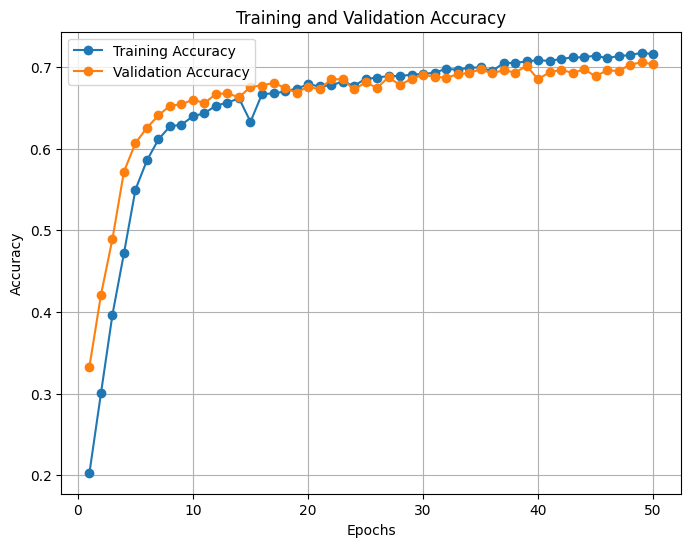

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy = history_bigru_no_e.history['accuracy']
val_accuracy = history_bigru_no_e.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


### model with no dropouts

In [ ]:
#try increasing the l2=0.02 and try(final try)
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization


bigru_no_earlystopping_lr11= Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
   Bidirectional(GRU(32, return_sequences=False,kernel_regularizer=l2(0.01))),
    Dropout(0.1),
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(7, activation='softmax')
])
bigru_no_earlystopping_lr11.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_bigru_no_e1 = bigru_no_earlystopping_lr11.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.3,
    class_weight=class_weight_dict1,
    verbose=1
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 155s 143ms/step - accuracy: 0.2211 - loss: 4.5268 - val_accuracy: 0.3727 - val_loss: 2.8735
Epoch 2/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 136s 143ms/step - accuracy: 0.4076 - loss: 2.6128 - val_accuracy: 0.5037 - val_loss: 2.0782
Epoch 3/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 143s 144ms/step - accuracy: 0.5162 - loss: 2.0165 - val_accuracy: 0.6025 - val_loss: 1.5990
Epoch 4/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 141s 143ms/step - accuracy: 0.5978 - loss: 1.6396 - val_accuracy: 0.6259 - val_loss: 1.4430
Epoch 5/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 144s 145ms/step - accuracy: 0.6263 - loss: 1.4343 - val_accuracy: 0.6481 - val_loss: 1.3117
Epoch 6/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 141s 144ms/step - accuracy: 0.6450 - loss: 1.3173 - val_accuracy: 0.6661 - val_loss: 1.2370
Epoch 7/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 132s 144ms/step - accuracy: 0.6678 - loss: 1.1920 - val_accuracy: 0.6829 - val_loss: 1.1544
Epoch 8/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 143s 144ms/step - accuracy: 0.6783 -

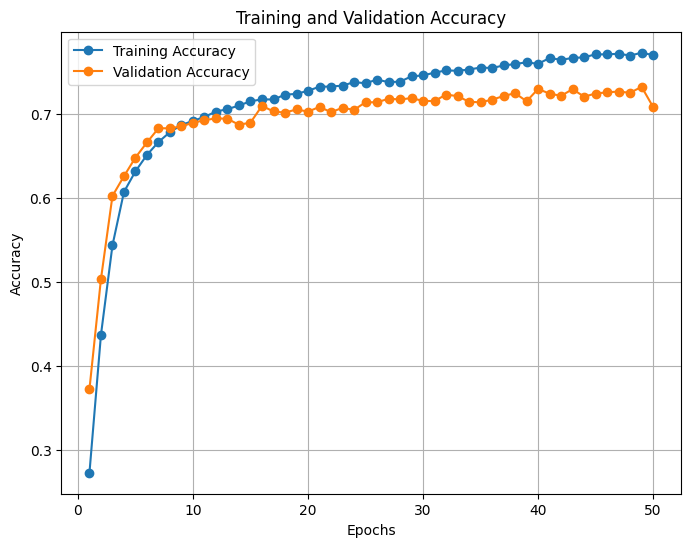

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy = history_bigru_no_e1.history['accuracy']
val_accuracy = history_bigru_no_e1.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred = bigru_no_earlystopping_lr11.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       768
           1       0.68      0.76      0.72       556
           2       0.73      0.55      0.63      3081
           3       0.92      0.88      0.90      3269
           4       0.26      0.76      0.39       215
           5       0.36      0.77      0.50       517
           6       0.66      0.61      0.64      2131

    accuracy                           0.71     10537
   macro avg       0.62      0.73      0.65     10537
weighted avg       0.75      0.71      0.72     10537



### Try the below model for dropout of 0.2

In [ ]:
model checkpointing also

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization


bigru_no_earlystopping_lr1= Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
   Bidirectional(GRU(32, return_sequences=False,kernel_regularizer='l2')),
    #Dropout(0.3),
    Dense(64, activation='relu',kernel_regularizer='l2'),
    #Dropout(0.3),
    Dense(7, activation='softmax')
])
bigru_no_earlystopping_lr1.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_bigru_no_e = bigru_no_earlystopping_lr1.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.3,
    class_weight=class_weight_dict1,
    verbose=1
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 180s 176ms/step - accuracy: 0.2268 - loss: 4.5332 - val_accuracy: 0.3693 - val_loss: 2.8489
Epoch 2/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 179s 151ms/step - accuracy: 0.4229 - loss: 2.5595 - val_accuracy: 0.5106 - val_loss: 2.0624
Epoch 3/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 142s 151ms/step - accuracy: 0.5513 - loss: 1.9304 - val_accuracy: 0.6200 - val_loss: 1.6194
Epoch 4/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 142s 151ms/step - accuracy: 0.6362 - loss: 1.5781 - val_accuracy: 0.6514 - val_loss: 1.4380
Epoch 5/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 141s 151ms/step - accuracy: 0.6695 - loss: 1.3667 - val_accuracy: 0.6686 - val_loss: 1.3346
Epoch 6/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 142s 151ms/step - accuracy: 0.6848 - loss: 1.2459 - val_accuracy: 0.6913 - val_loss: 1.2052
Epoch 7/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 142s 151ms/step - accuracy: 0.6904 - loss: 1.1803 - val_accuracy: 0.6832 - val_loss: 1.1995
Epoch 8/50
922/922 ━━━━━━━━━━━━━━━━━━━━ 142s 150ms/step - accuracy: 0.7002 -

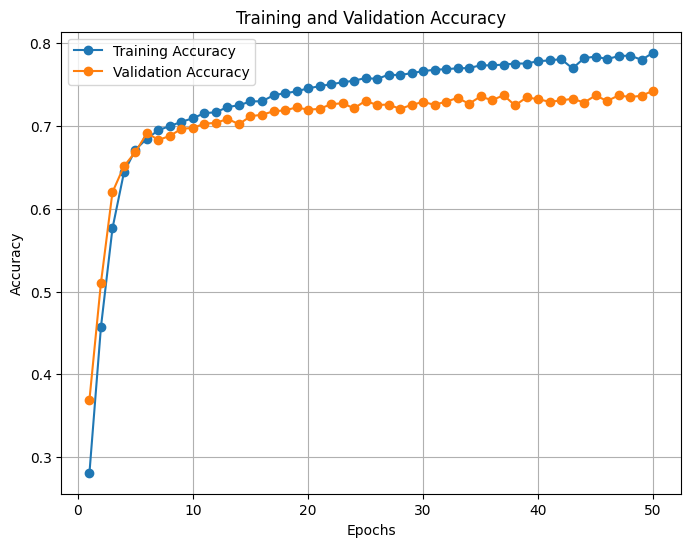

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy = history_bigru_no_e.history['accuracy']
val_accuracy = history_bigru_no_e.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='model_checkpoint_trail6.keras',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)


### bigru with no dropouts(128)


In [ ]:
#selected for bigru
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization



bigru_complex_model1= Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
   Bidirectional(GRU(128, return_sequences=False,kernel_regularizer=l2(0.03))),
    Dropout(0.5),
    Dense(64, activation='relu',kernel_regularizer=l2(0.03)),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

bigru_complex_model1.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = bigru_complex_model1.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    #callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 223s 189ms/step - accuracy: 0.2258 - loss: 16.2642 - val_accuracy: 0.4590 - val_loss: 4.5831
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 200s 189ms/step - accuracy: 0.4692 - loss: 3.7531 - val_accuracy: 0.6102 - val_loss: 2.0830
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 189ms/step - accuracy: 0.6062 - loss: 1.9928 - val_accuracy: 0.6213 - val_loss: 1.6438
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 200s 190ms/step - accuracy: 0.6182 - loss: 1.5579 - val_accuracy: 0.6303 - val_loss: 1.4143
Epoch 5/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 199s 189ms/step - accuracy: 0.6330 - loss: 1.3350 - val_accuracy: 0.6436 - val_loss: 1.2325
Epoch 6/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 189ms/step - accuracy: 0.6413 - loss: 1.2076 - val_accuracy: 0.6344 - val_loss: 1.2070
Epoch 7/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 189ms/step - accuracy: 0.6478 - loss: 1.1395 - val_accuracy: 0.6541 - val_loss: 1.1396
Epoch 8/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 201s 188ms/step - a

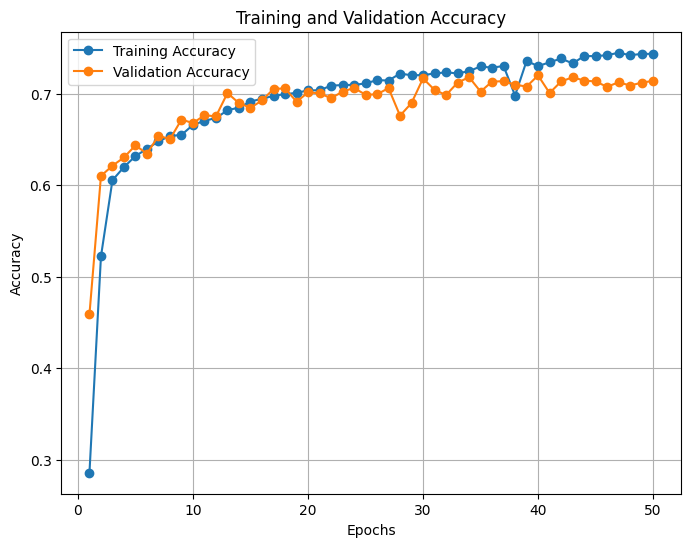

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred =bigru_complex_model1.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       768
           1       0.58      0.82      0.68       556
           2       0.78      0.50      0.61      3081
           3       0.92      0.88      0.90      3269
           4       0.42      0.68      0.52       215
           5       0.37      0.74      0.50       517
           6       0.62      0.72      0.66      2131

    accuracy                           0.72     10537
   macro avg       0.63      0.73      0.66     10537
weighted avg       0.75      0.72      0.72     10537



### bigru 128 nodes

In [ ]:

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization



bigru_complex_model= Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
   Bidirectional(GRU(128, return_sequences=False,kernel_regularizer='l2')),
    Dropout(0.5),
    Dense(64, activation='relu',kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

bigru_complex_model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = bigru_complex_model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    #callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 212s 184ms/step - accuracy: 0.1859 - loss: 7.0819 - val_accuracy: 0.4495 - val_loss: 3.5008
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 201s 183ms/step - accuracy: 0.4356 - loss: 3.2260 - val_accuracy: 0.6249 - val_loss: 2.2655
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 182ms/step - accuracy: 0.5907 - loss: 2.2651 - val_accuracy: 0.6423 - val_loss: 1.8250
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 182ms/step - accuracy: 0.6398 - loss: 1.7902 - val_accuracy: 0.6608 - val_loss: 1.5823
Epoch 5/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 192s 182ms/step - accuracy: 0.6594 - loss: 1.5382 - val_accuracy: 0.6767 - val_loss: 1.3987
Epoch 6/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 192s 183ms/step - accuracy: 0.6671 - loss: 1.3769 - val_accuracy: 0.6769 - val_loss: 1.3069
Epoch 7/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 193s 183ms/step - accuracy: 0.6729 - loss: 1.2644 - val_accuracy: 0.6914 - val_loss: 1.2145
Epoch 8/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 183ms/step - ac

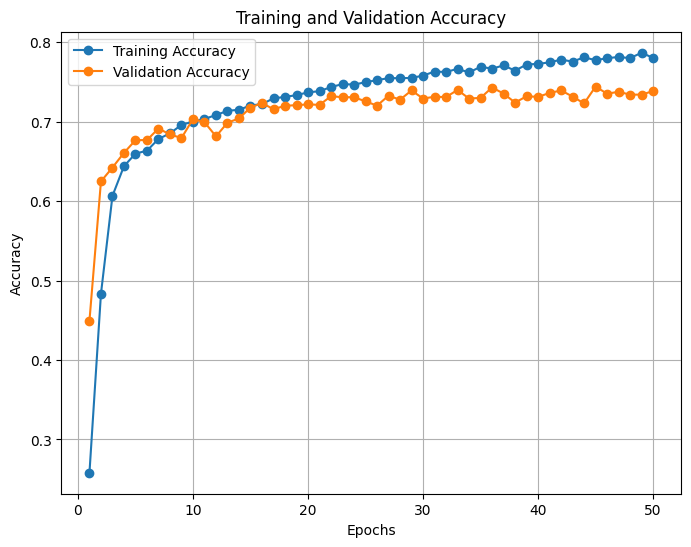

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred =bigru_complex_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 37s 111ms/step
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       768
           1       0.69      0.79      0.74       556
           2       0.78      0.54      0.64      3081
           3       0.92      0.90      0.91      3269
           4       0.40      0.72      0.51       215
           5       0.44      0.72      0.54       517
           6       0.63      0.74      0.68      2131

    accuracy                           0.74     10537
   macro avg       0.66      0.74      0.68     10537
weighted avg       0.76      0.74      0.74     10537



In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model_checkpoint_trail_6.h5')  # Load saved model
model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    initial_epoch= 80 # Start training from the 5th epoch
)


In [ ]:
#60:40 DOESNOT WORK
TRY 128 AND 0.03 REGULARIZATION

### Hyperparameter optimization of BIGRU(BAeysian Optmization)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
from keras_tuner import BayesianOptimization
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model_gru_w2v4_tuner2 = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=embed_dim,
                  input_length=max_rev_len,
                  embeddings_initializer=Constant(embed_matrix),
                  trainable=False),
        Bidirectional(GRU(
            hp.Int('gru_units', min_value=32, max_value=128, step=32),  # Tune GRU units
            return_sequences=False,
            kernel_regularizer='l2'
        )),

        Dropout(hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1)),  # Tune Dropout rate
        Dense(
            hp.Int('dense_units', min_value=16, max_value=64, step=16),  # Tune Dense units
            activation=hp.Choice('dense_activation', ['relu', 'tanh']),  # Tune activation function
            kernel_regularizer='l2'
        ),

        Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(7, activation='softmax')  # Output layer
    ])

    model_gru_w2v4_tuner2.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2,1e-3, 1e-4, 1e-5])),  # Tune learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return  model_gru_w2v4_tuner2

# Define the BayesianOptimization tuner
tuner12 = BayesianOptimization(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,  # Number of models to try
    executions_per_trial=1,  # Number of times to evaluate each model
    directory=' model_gru_w2v4_tuner2',
    project_name='bigru_w2v4_tuning_bayesian_tuner2'
)

# Define early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Start the search process
tuner12.search(
    x_train,
    y_train,
    epochs=15,
    validation_split=0.2,
    batch_size=32,
    class_weight=class_weight_dict1,
    callbacks=[early_stopping]  # Include early stopping
)


Trial 7 Complete [00h 17m 09s]
val_accuracy: 0.07272511720657349

Best val_accuracy So Far: 0.7300984859466553
Total elapsed time: 03h 35m 04s

Search: Running Trial #8

Value             |Best Value So Far |Hyperparameter
128               |64                |gru_units
0.2               |0.5               |dropout_rate_1
32                |16                |dense_units
relu              |relu              |dense_activation
0.2               |0.1               |dropout_rate_2
0.001             |0.001             |learning_rate

Epoch 1/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 210s 183ms/step - accuracy: 0.4735 - loss: 3.0483 - val_accuracy: 0.6505 - val_loss: 1.2111
Epoch 2/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 193s 183ms/step - accuracy: 0.6696 - loss: 1.1322 - val_accuracy: 0.6500 - val_loss: 1.2101
Epoch 3/15
 363/1054 ━━━━━━━━━━━━━━━━━━━━ 1:55 168ms/step - accuracy: 0.6865 - loss: 1.0841

In [ ]:
#try first trail of bigru

#### Hyperparameter Optimization of BILSTM(baeysian optmization)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
from keras_tuner import BayesianOptimization
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model_bilstm_w2v4_tuner2 = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=embed_dim,
                  input_length=max_rev_len,
                  embeddings_initializer=Constant(embed_matrix),
                  trainable=False),
        Bidirectional(LSTM(
            hp.Int('LSTM_units', min_value=32, max_value=128, step=32),  # Tune GRU units
            return_sequences=False,
            kernel_regularizer='l2'
        )),

        Dropout(hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1)),  # Tune Dropout rate
        Dense(
            hp.Int('dense_units', min_value=16, max_value=64, step=16),  # Tune Dense units
            activation=hp.Choice('dense_activation', ['relu', 'tanh']),  # Tune activation function
            kernel_regularizer='l2'
        ),

        Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(7, activation='softmax')  # Output layer
    ])

    model_bilstm_w2v4_tuner2.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2,1e-3, 1e-4, 1e-5])),  # Tune learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return  model_bilstm_w2v4_tuner2

# Define the BayesianOptimization tuner
tuner13 = BayesianOptimization(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,  # Number of models to try
    executions_per_trial=1,  # Number of times to evaluate each model
    directory=' model_bilstm_w2v4_tuner2',
    project_name='bilstm_w2v4_tuning_bayesian_tuner2'
)

# Define early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Start the search process
tuner13.search(
    x_train,
    y_train,
    epochs=15,
    validation_split=0.2,
    batch_size=32,
    class_weight=class_weight_dict1,
    callbacks=[early_stopping]  # Include early stopping
)


Trial 4 Complete [01h 02m 04s]
val_accuracy: 0.7185905575752258

Best val_accuracy So Far: 0.7185905575752258
Total elapsed time: 02h 54m 08s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
128               |128               |LSTM_units
0.4               |0.5               |dropout_rate_1
16                |16                |dense_units
tanh              |tanh              |dense_activation
0.5               |0.4               |dropout_rate_2
0.0001            |0.0001            |learning_rate

Epoch 1/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 223s 196ms/step - accuracy: 0.2110 - loss: 7.0421 - val_accuracy: 0.5317 - val_loss: 3.2037
Epoch 2/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 261s 195ms/step - accuracy: 0.4830 - loss: 2.8750 - val_accuracy: 0.6155 - val_loss: 2.0358
Epoch 3/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 261s 194ms/step - accuracy: 0.5933 - loss: 2.0134 - val_accuracy: 0.6621 - val_loss: 1.6164
Epoch 4/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 262s 194ms/step - acc

### LSTM hyperparameter tunning (Baeysian Optmization)

In [ ]:
#consider this model 1(use model checkpoints slected)
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='bilstm_best_model_mob.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)

# Model definition
bilstm_no_earlystopping_mob111 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
    Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer='l2')),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    Dense(7, activation='softmax')
])

bilstm_no_earlystopping_mob111.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training with checkpoint callback
history_bilstm_no_e_mob111 = bilstm_no_earlystopping_mob111.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    verbose=1,
    callbacks=[checkpoint_callback]  # Include checkpoint callback
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.2998 - loss: 5.5945
Epoch 1: val_accuracy improved from -inf to 0.56578, saving model to bilstm_best_model_mob.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 221s 191ms/step - accuracy: 0.2999 - loss: 5.5931 - val_accuracy: 0.5658 - val_loss: 2.3393
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5997 - loss: 2.0516
Epoch 2: val_accuracy improved from 0.56578 to 0.64183, saving model to bilstm_best_model_mob.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 265s 197ms/step - accuracy: 0.5997 - loss: 2.0514 - val_accuracy: 0.6418 - val_loss: 1.6755
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6631 - loss: 1.5517
Epoch 3: val_accuracy improved from 0.64183 to 0.67078, saving model to bilstm_best_model_mob.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 261s 196ms/step - accuracy: 0.6631 - loss: 1.5517 - val_accuracy: 0.6708 - val_loss: 1.4471
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accura

In [ ]:
import numpy as np

# Get the epoch with the highest validation accuracy
best_epoch1 = np.argmax(history_bilstm_no_e_mob111.history['val_accuracy']) + 1  # Adding 1 since epochs start from 1
best_val_acc1 = np.max(history_bilstm_no_e_mob111.history['val_accuracy'])

print(f"Best epoch: {best_epoch1}, Best validation accuracy: {best_val_acc1:.4f}")

Best epoch: 48, Best validation accuracy: 0.7328


In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model2 = load_model('bilstm_best_model_mob.keras')

In [ ]:
best_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 2520, 300)           │      18,601,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │         186,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,168,991 (73.12 MB)

 Trainable params: 189,063 (738.53 KB)

 Non-trainable params: 18,601,800 (70.96 MB)

 Optimizer params: 378,128 (1.44 MB)

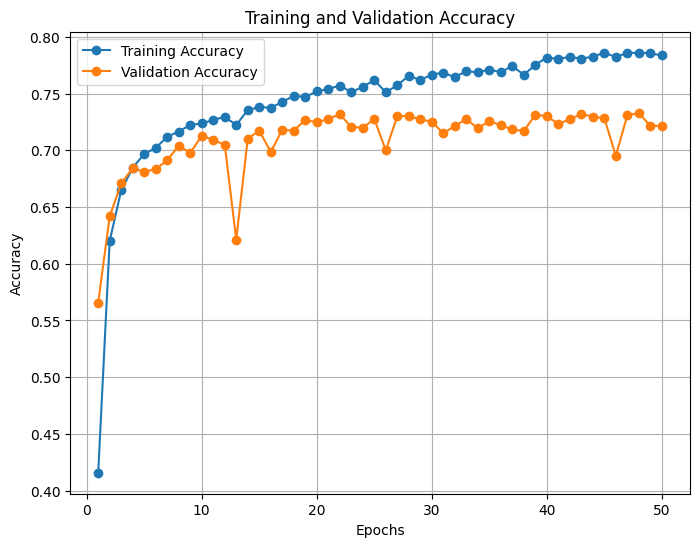

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy =history_bilstm_no_e_mob111.history['accuracy']
val_accuracy = history_bilstm_no_e_mob111.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred =best_model2.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       768
           1       0.60      0.80      0.69       556
           2       0.74      0.56      0.64      3081
           3       0.92      0.90      0.91      3269
           4       0.43      0.55      0.48       215
           5       0.43      0.67      0.53       517
           6       0.64      0.70      0.67      2131

    accuracy                           0.73     10537
   macro avg       0.64      0.71      0.67     10537
weighted avg       0.75      0.73      0.73     10537



In [ ]:
# slected -bilstm(0.2 and train)
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='bilstm_best_model_mob_dropout.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)

# Model definition
bilstm_no_earlystopping_mob_dropout = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
    Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer='l2')),
    Dropout(0.1),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    Dropout(0.1),
    Dense(7, activation='softmax')
])

bilstm_no_earlystopping_mob_dropout.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training with checkpoint callback
history_bilstm_no_e_mob_dropout = bilstm_no_earlystopping_mob_dropout.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    verbose=1,
    callbacks=[checkpoint_callback]  # Include checkpoint callback
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.2489 - loss: 5.7318
Epoch 1: val_accuracy improved from -inf to 0.57326, saving model to bilstm_best_model_mob_dropout.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 231s 199ms/step - accuracy: 0.2490 - loss: 5.7305 - val_accuracy: 0.5733 - val_loss: 2.5023
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.5712 - loss: 2.2283
Epoch 2: val_accuracy improved from 0.57326 to 0.64314, saving model to bilstm_best_model_mob_dropout.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 255s 196ms/step - accuracy: 0.5712 - loss: 2.2281 - val_accuracy: 0.6431 - val_loss: 1.6677
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6206 - loss: 1.6416
Epoch 3: val_accuracy did not improve from 0.64314
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 232s 167ms/step - accuracy: 0.6206 - loss: 1.6415 - val_accuracy: 0.6365 - val_loss: 1.4865
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.6338 - loss: 1.4357
Epoch 4

In [ ]:
import numpy as np

# Get the epoch with the highest validation accuracy
best_epoch2 = np.argmax(history_bilstm_no_e_mob_dropout.history['val_accuracy']) + 1  # Adding 1 since epochs start from 1
best_val_acc2 = np.max(history_bilstm_no_e_mob_dropout.history['val_accuracy'])

print(f"Best epoch: {best_epoch2}, Best validation accuracy: {best_val_acc2:.4f}")

Best epoch: 47, Best validation accuracy: 0.7357


In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model3 = load_model('bilstm_best_model_mob_dropout.keras')

In [ ]:
best_model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 2520, 300)           │      18,601,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │         186,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,168,991 (73.12 MB)

 Trainable params: 189,063 (738.53 KB)

 Non-trainable params: 18,601,800 (70.96 MB)

 Optimizer params: 378,128 (1.44 MB)

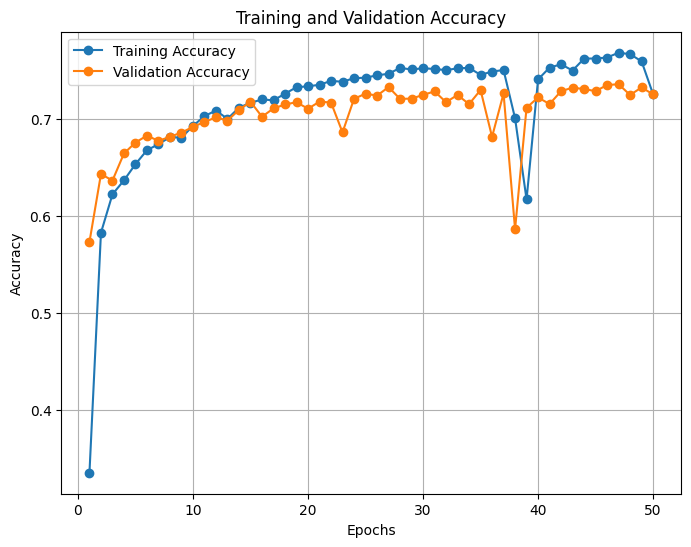

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy =history_bilstm_no_e_mob_dropout.history['accuracy']
val_accuracy = history_bilstm_no_e_mob_dropout.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred =best_model3.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step
              precision    recall  f1-score   support

           0       0.69      0.81      0.74       768
           1       0.66      0.80      0.72       556
           2       0.76      0.53      0.63      3081
           3       0.92      0.90      0.91      3269
           4       0.42      0.59      0.49       215
           5       0.46      0.69      0.56       517
           6       0.62      0.73      0.67      2131

    accuracy                           0.73     10537
   macro avg       0.65      0.72      0.67     10537
weighted avg       0.75      0.73      0.73     10537



#### END

In [ ]:
#consider this model 1
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization


bilstm_no_earlystopping= Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
   Bidirectional(GRU(32, return_sequences=False,kernel_regularizer='l2')),
    Dropout(0.5),
    Dense(64, activation='relu',kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])
bilstm_no_earlystopping.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_bilstm_no_e = bilstm_no_earlystopping.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    verbose=1
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 165s 136ms/step - accuracy: 0.1555 - loss: 4.6391 - val_accuracy: 0.3114 - val_loss: 3.0163
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 197s 137ms/step - accuracy: 0.2529 - loss: 2.8809 - val_accuracy: 0.4257 - val_loss: 2.4501
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 201s 136ms/step - accuracy: 0.3740 - loss: 2.3864 - val_accuracy: 0.4988 - val_loss: 2.0508
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 207s 141ms/step - accuracy: 0.4430 - loss: 2.0719 - val_accuracy: 0.5921 - val_loss: 1.6368
Epoch 5/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 144s 137ms/step - accuracy: 0.5466 - loss: 1.7331 - val_accuracy: 0.6269 - val_loss: 1.4121
Epoch 6/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 207s 142ms/step - accuracy: 0.5884 - loss: 1.5418 - val_accuracy: 0.6302 - val_loss: 1.3279
Epoch 7/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 201s 141ms/step - accuracy: 0.6085 - loss: 1.3985 - val_accuracy: 0.6449 - val_loss: 1.2175
Epoch 8/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 202s 142ms/step - ac

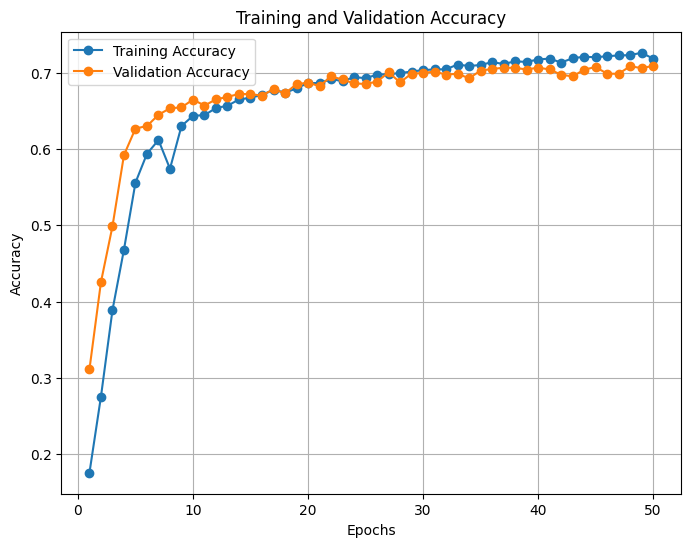

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy = history_bilstm_no_e.history['accuracy']
val_accuracy = history_bilstm_no_e.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

y_pred =bilstm_no_earlystopping.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       768
           1       0.64      0.80      0.71       556
           2       0.77      0.45      0.57      3081
           3       0.91      0.90      0.90      3269
           4       0.36      0.69      0.48       215
           5       0.40      0.67      0.50       517
           6       0.59      0.75      0.66      2131

    accuracy                           0.71     10537
   macro avg       0.63      0.72      0.65     10537
weighted avg       0.74      0.71      0.71     10537



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Create the EarlyStopping callback
early_stopping1 = EarlyStopping(monitor='val_accuracy',  # Monitor validation loss
                               patience=4,
                               restore_best_weights=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
from keras_tuner import BayesianOptimization
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model_lstm_w2v4_tuner2 = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=embed_dim,
                  input_length=max_rev_len,
                  embeddings_initializer=Constant(embed_matrix),
                  trainable=False),
        LSTM(
            hp.Int('only-LSTM_units', min_value=32, max_value=128, step=32),  # Tune GRU units
            return_sequences=False,
            kernel_regularizer='l2'
        ),

        Dropout(hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1)),  # Tune Dropout rate
        Dense(
            hp.Int('dense_units', min_value=16, max_value=64, step=16),  # Tune Dense units
            activation=hp.Choice('dense_activation', ['relu', 'tanh']),  # Tune activation function
            kernel_regularizer='l2'
        ),

        Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(7, activation='softmax')  # Output layer
    ])

    model_lstm_w2v4_tuner2.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2,1e-3, 1e-4, 1e-5])),  # Tune learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return  model_lstm_w2v4_tuner2

# Define the BayesianOptimization tuner
tuner14 = BayesianOptimization(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,  # Number of models to try
    executions_per_trial=1,  # Number of times to evaluate each model
    directory=' model_lstm_w2v4_tuner2',
    project_name='lstm_w2v4_tuning_bayesian_tuner2'
)

# Define early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Start the search process
tuner14.search(
    x_train,
    y_train,
    epochs=15,
    validation_split=0.2,
    batch_size=32,
    class_weight=class_weight_dict1,
    callbacks=[early_stopping1]  # Include early stopping
)



Trial 8 Complete [00h 07m 03s]
val_accuracy: 0.28888362646102905

Best val_accuracy So Far: 0.28888362646102905
Total elapsed time: 01h 22m 52s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
128               |32                |only-LSTM_units
0.2               |0.1               |dropout_rate_1
16                |64                |dense_units
relu              |tanh              |dense_activation
0.3               |0.1               |dropout_rate_2
0.0001            |0.001             |learning_rate

Epoch 1/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 119s 97ms/step - accuracy: 0.2360 - loss: 4.0303 - val_accuracy: 0.2889 - val_loss: 2.0354
Epoch 2/15
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 140s 95ms/step - accuracy: 0.2245 - loss: 1.9878 - val_accuracy: 0.0505 - val_loss: 1.9523
Epoch 3/15
 524/1054 ━━━━━━━━━━━━━━━━━━━━ 45s 86ms/step - accuracy: 0.0641 - loss: 1.9941

### CNN

In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='cnn_best_model_mob_dropout.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)

# Model definition
cnn_model_dropout = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
    Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

cnn_model_dropout.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Training with checkpoint callback
history_cnn_model_dropout= cnn_model_dropout.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    verbose=1,
    callbacks=[checkpoint_callback]  # Include checkpoint callback
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2164 - loss: 3.1776
Epoch 1: val_accuracy improved from -inf to 0.40301, saving model to cnn_best_model_mob_dropout.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 88s 69ms/step - accuracy: 0.2164 - loss: 3.1768 - val_accuracy: 0.4030 - val_loss: 1.8419
Epoch 2/50
1053/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3822 - loss: 1.8367
Epoch 2: val_accuracy improved from 0.40301 to 0.55855, saving model to cnn_best_model_mob_dropout.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 79s 68ms/step - accuracy: 0.3823 - loss: 1.8366 - val_accuracy: 0.5585 - val_loss: 1.4852
Epoch 3/50
1053/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4839 - loss: 1.6053
Epoch 3: val_accuracy improved from 0.55855 to 0.60671, saving model to cnn_best_model_mob_dropout.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.4840 - loss: 1.6052 - val_accuracy: 0.6067 - val_loss: 1.2871
Epoch 4/50
1053/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - a

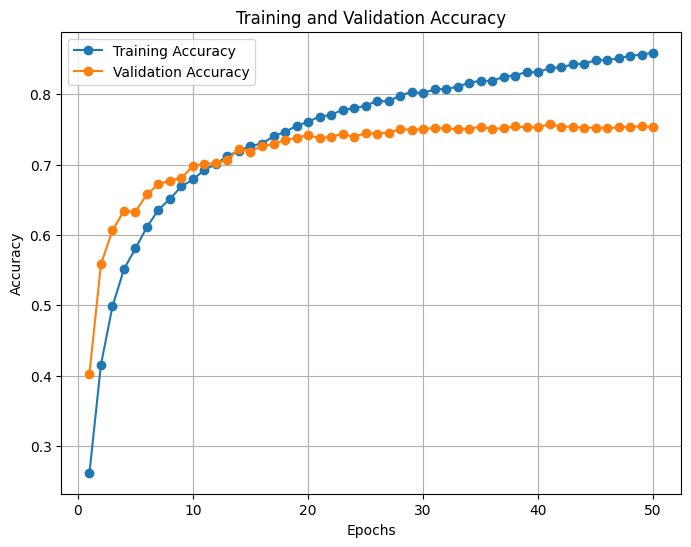

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy = history_cnn_model_dropout.history['accuracy']
val_accuracy = history_cnn_model_dropout.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np

# Get the epoch with the highest validation accuracy
best_epoch_cnn_dropout = np.argmax(history_cnn_model_dropout.history['val_accuracy']) + 1  # Adding 1 since epochs start from 1
best_val_acc_cnn_dropout = np.max(history_cnn_model_dropout.history['val_accuracy'])

print(f"Best epoch: {best_epoch_cnn_dropout}, Best validation accuracy: {best_val_acc_cnn_dropout:.4f}")

Best epoch: 41, Best validation accuracy: 0.7577


In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model_cnn_dropout = load_model('cnn_best_model_mob_dropout.keras')

In [ ]:
best_model_cnn_dropout.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 2520, 300)           │      18,601,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 2520, 128)           │         192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,184,735 (73.18 MB)

 Trainable params: 194,311 (759.03 KB)

 Non-trainable params: 18,601,800 (70.96 MB)

 Optimizer params: 388,624 (1.48 MB)

In [ ]:
print(y_test.shape)  # Should be (num_samples, num_classes) if one-hot encoded


(10537,)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.models import load_model

# Predict probabilities
y_pred = best_model_cnn_dropout.predict(x_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# No need to apply np.argmax on y_test, use it as is
print(classification_report(y_test, y_pred))


330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       768
           1       0.78      0.74      0.76       556
           2       0.75      0.60      0.67      3081
           3       0.91      0.92      0.91      3269
           4       0.71      0.59      0.64       215
           5       0.53      0.62      0.57       517
           6       0.62      0.75      0.68      2131

    accuracy                           0.75     10537
   macro avg       0.72      0.72      0.72     10537
weighted avg       0.76      0.75      0.75     10537



In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='cnn_best_model_mob_dropout11.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)

# Model definition
cnn_model_dropout11 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
    Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(12, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

cnn_model_dropout11.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Training with checkpoint callback
history_cnn_model_dropout11= cnn_model_dropout11.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    verbose=1,
    callbacks=[checkpoint_callback]  # Include checkpoint callback
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1565 - loss: 2.8806
Epoch 1: val_accuracy improved from -inf to 0.10867, saving model to cnn_best_model_mob_dropout11.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 126s 99ms/step - accuracy: 0.1565 - loss: 2.8801 - val_accuracy: 0.1087 - val_loss: 2.1561
Epoch 2/50
1053/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1518 - loss: 2.1282
Epoch 2: val_accuracy improved from 0.10867 to 0.25305, saving model to cnn_best_model_mob_dropout11.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 136s 96ms/step - accuracy: 0.1519 - loss: 2.1281 - val_accuracy: 0.2531 - val_loss: 2.0156
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2663 - loss: 2.0069
Epoch 3: val_accuracy improved from 0.25305 to 0.39459, saving model to cnn_best_model_mob_dropout11.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 145s 99ms/step - accuracy: 0.2663 - loss: 2.0069 - val_accuracy: 0.3946 - val_loss: 1.8506
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms

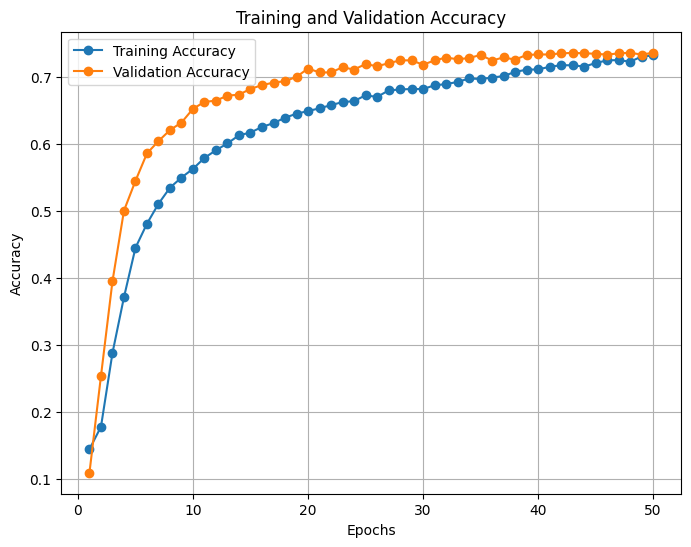

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy = history_cnn_model_dropout11.history['accuracy']
val_accuracy = history_cnn_model_dropout11.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np

# Get the epoch with the highest validation accuracy
best_epoch_cnn_dropout11 = np.argmax(history_cnn_model_dropout11.history['val_accuracy']) + 1  # Adding 1 since epochs start from 1
best_val_acc_cnn_dropout11 = np.max(history_cnn_model_dropout11.history['val_accuracy'])

print(f"Best epoch: {best_epoch_cnn_dropout11}, Best validation accuracy: {best_val_acc_cnn_dropout11:.4f}")

Best epoch: 48, Best validation accuracy: 0.7359


In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model_cnn_dropout11 = load_model('cnn_best_model_mob_dropout11.keras')

In [ ]:
best_model_cnn_dropout11.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 2520, 300)           │      18,601,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 2520, 128)           │         192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_4               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 12)                  │           1,548 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │              91 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,183,103 (73.18 MB)

 Trainable params: 193,767 (756.90 KB)

 Non-trainable params: 18,601,800 (70.96 MB)

 Optimizer params: 387,536 (1.48 MB)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.models import load_model

# Predict probabilities
y_pred = best_model_cnn_dropout11.predict(x_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# No need to apply np.argmax on y_test, use it as is
print(classification_report(y_test, y_pred))

### GRU

In [ ]:
#consider this model 2(use model checkpoints slected)
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='gru_best_model_mob111.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)
gru_no_earlystopping_mob=Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
    GRU(128, return_sequences=True),  # Increase units & keep sequences
    GRU(64, return_sequences=False),
    Dense(32,activation='relu'),# Another GRU layer
    Dense(32, activation='relu'),
    #Dropout(0.2),  # Prevent overfitting
    Dense(7, activation='softmax')
])



gru_no_earlystopping_mob.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training with checkpoint callback
history_gru_no_earlystopping_mob = gru_no_earlystopping_mob.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.3,
    class_weight=class_weight_dict1,
    verbose=1,
    callbacks=[checkpoint_callback]  # Include checkpoint callback
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.1320 - loss: 1.9373
Epoch 1: val_accuracy improved from -inf to 0.02017, saving model to gru_best_model_mob111.keras
461/461 ━━━━━━━━━━━━━━━━━━━━ 166s 325ms/step - accuracy: 0.1319 - loss: 1.9374 - val_accuracy: 0.0202 - val_loss: 1.9492
Epoch 2/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.0264 - loss: 1.9599
Epoch 2: val_accuracy did not improve from 0.02017
461/461 ━━━━━━━━━━━━━━━━━━━━ 158s 230ms/step - accuracy: 0.0264 - loss: 1.9599 - val_accuracy: 0.0202 - val_loss: 1.9468
Epoch 3/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.2434 - loss: 1.9254
Epoch 3: val_accuracy improved from 0.02017 to 0.04730, saving model to gru_best_model_mob111.keras
461/461 ━━━━━━━━━━━━━━━━━━━━ 149s 323ms/step - accuracy: 0.2434 - loss: 1.9255 - val_accuracy: 0.0473 - val_loss: 1.9523
Epoch 4/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.0416 - loss: 1.9540
Epoch 4: val_accuracy did not improve

In [ ]:
yt on sentiment analyais check

In [ ]:
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
#consider this model 2(use model checkpoints slected)
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint



# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='gru_best_model_mob2.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)
gru_improved = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=True),

   Bidirectional( GRU(64, return_sequences=True)),
    BatchNormalization(),

    GRU(32, return_sequences=False),

    Dense(7, activation='softmax')
])

gru_improved.compile(optimizer=Adam(learning_rate=0.0005),  # Increased learning rate
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

gru_improved.fit(x_train, y_train,
                 epochs=50,
                 batch_size=64,
                 validation_split=0.3,
                 class_weight=class_weight_dict1,
                 verbose=1,
                 callbacks=[checkpoint_callback])


Epoch 1/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.1331 - loss: 1.9385
Epoch 1: val_accuracy improved from -inf to 0.07506, saving model to gru_best_model_mob2.keras
461/461 ━━━━━━━━━━━━━━━━━━━━ 239s 483ms/step - accuracy: 0.1331 - loss: 1.9386 - val_accuracy: 0.0751 - val_loss: 1.9603
Epoch 2/50
 25/461 ━━━━━━━━━━━━━━━━━━━━ 2:07 293ms/step - accuracy: 0.0581 - loss: 2.1154

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf

# Define number of splits
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store results
accuracy_per_fold = []
loss_per_fold = []

for fold, (train_idx, val_idx) in enumerate(kf.split(x_train)):
    print(f"Training on fold {fold + 1}/{k}...")

    # Split data
    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Define model
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embed_dim,
                  input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
        GRU(128, return_sequences=True),
        GRU(64, return_sequences=False),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(7, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Define ModelCheckpoint
    checkpoint_callback = ModelCheckpoint(
        filepath=f'gru_best_model_fold{fold + 1}.keras',
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=False,
        mode='max',
        verbose=1
    )

    # Train model
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=50,
        batch_size=64,
        validation_data=(x_val_fold, y_val_fold),
        class_weight=class_weight_dict1,
        verbose=1,
        callbacks=[checkpoint_callback]
    )

    # Evaluate model
    scores = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold + 1} - Loss: {scores[0]} - Accuracy: {scores[1]}")

    loss_per_fold.append(scores[0])
    accuracy_per_fold.append(scores[1])

# Print final cross-validation results
print(f"Average Accuracy: {np.mean(accuracy_per_fold)} ± {np.std(accuracy_per_fold)}")
print(f"Average Loss: {np.mean(loss_per_fold)} ± {np.std(loss_per_fold)}")


### try bigru and gru layers

In [ ]:
#slected
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='gru_best_model_final.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)


bigru_model_final= Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
   Bidirectional(GRU(32, return_sequences=False,kernel_regularizer='l2')),
    Dropout(0.2),
    Dense(64, activation='relu',kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
bigru_model_final.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_bigru_model_final = bigru_model_final.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    callbacks=[checkpoint_callback],
    verbose=1
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.1767 - loss: 4.5145
Epoch 1: val_accuracy improved from -inf to 0.34666, saving model to gru_best_model_final.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 231s 183ms/step - accuracy: 0.1768 - loss: 4.5138 - val_accuracy: 0.3467 - val_loss: 2.8345
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3581 - loss: 2.6182
Epoch 2: val_accuracy improved from 0.34666 to 0.50303, saving model to gru_best_model_final.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 186s 176ms/step - accuracy: 0.3582 - loss: 2.6181 - val_accuracy: 0.5030 - val_loss: 2.1073
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.4876 - loss: 2.0575
Epoch 3: val_accuracy improved from 0.50303 to 0.58512, saving model to gru_best_model_final.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 200s 175ms/step - accuracy: 0.4876 - loss: 2.0574 - val_accuracy: 0.5851 - val_loss: 1.6659
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy:

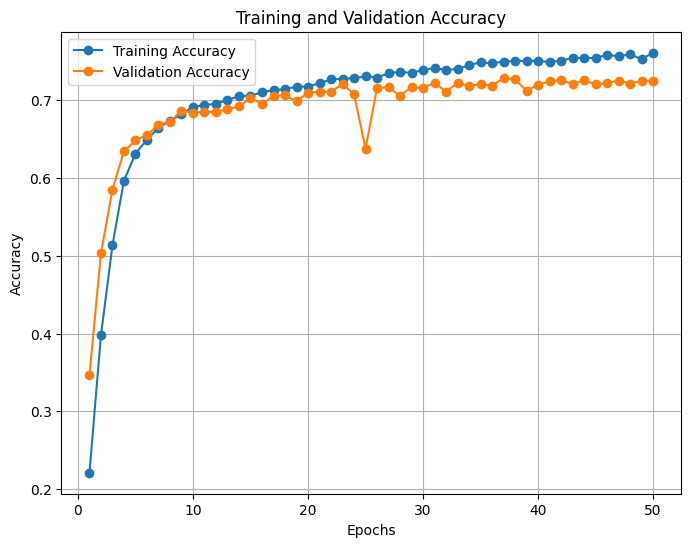

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy =history_bigru_model_final.history['accuracy']
val_accuracy = history_bigru_model_final.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np

# Get the epoch with the highest validation accuracy
best_epoch1 = np.argmax(history_bigru_model_final.history['val_accuracy']) + 1  # Adding 1 since epochs start from 1
best_val_acc1 = np.max(history_bigru_model_final.history['val_accuracy'])

print(f"Best epoch: {best_epoch1}, Best validation accuracy: {best_val_acc1:.4f}")

Best epoch: 37, Best validation accuracy: 0.7286


In [ ]:
# Get predictions (probabilities)
y_pred_probs = bigru_model_final.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Assuming one-hot encoded output

# Convert y_test from one-hot to class labels
y_true = np.argmax(y_test, axis=1)

330/330 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step


In [ ]:
bigru_model_final.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 2520, 300)           │      18,601,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,808,031 (71.75 MB)

 Trainable params: 68,743 (268.53 KB)

 Non-trainable params: 18,601,800 (70.96 MB)

 Optimizer params: 137,488 (537.07 KB)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Accuracy: 0.7224
Precision: 0.7506
Recall: 0.7224
F1 Score: 0.7224

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       768
           1       0.64      0.80      0.71       556
           2       0.77      0.49      0.59      3081
           3       0.92      0.90      0.91      3269
           4       0.38      0.67      0.48       215
           5       0.44      0.69      0.54       517
           6       0.60      0.77      0.67      2131

    accuracy                           0.72     10537
   macro avg       0.64      0.73      0.67     10537
weighted avg       0.75      0.72      0.72     10537



In [ ]:
#slected cnn
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='bilstm_best_model_final1.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)


bilstm_model_final1= Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
   Bidirectional(LSTM(32, return_sequences=False,kernel_regularizer='l2')),
    Dropout(0.2),
    Dense(64, activation='relu',kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
bilstm_model_final1.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_bilstm_model_final1 = bilstm_model_final1.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    callbacks=[checkpoint_callback],
    verbose=1
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.2135 - loss: 4.8514
Epoch 1: val_accuracy improved from -inf to 0.49259, saving model to bilstm_best_model_final1.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 218s 185ms/step - accuracy: 0.2136 - loss: 4.8506 - val_accuracy: 0.4926 - val_loss: 2.5890
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5106 - loss: 2.3199
Epoch 2: val_accuracy improved from 0.49259 to 0.63234, saving model to bilstm_best_model_final1.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 195s 185ms/step - accuracy: 0.5106 - loss: 2.3197 - val_accuracy: 0.6323 - val_loss: 1.6337
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6097 - loss: 1.6657
Epoch 3: val_accuracy improved from 0.63234 to 0.65144, saving model to bilstm_best_model_final1.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 196s 186ms/step - accuracy: 0.6098 - loss: 1.6656 - val_accuracy: 0.6514 - val_loss: 1.4457
Epoch 4/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

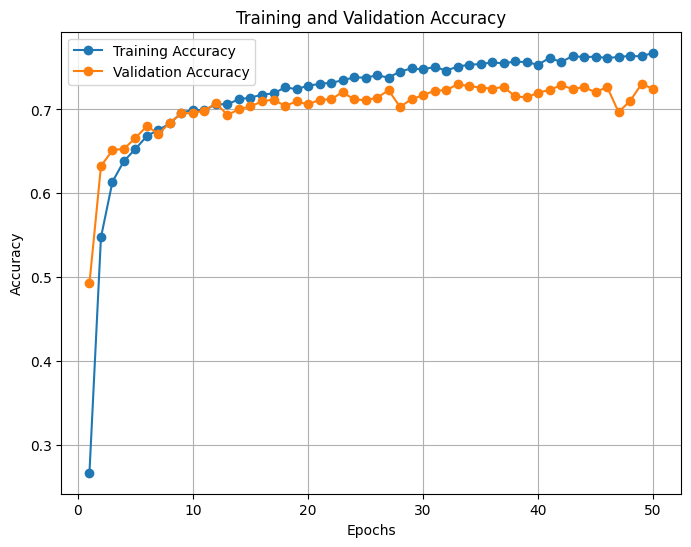

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy =history_bilstm_model_final1.history['accuracy']
val_accuracy = history_bilstm_model_final1.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np

# Get the epoch with the highest validation accuracy
best_epoch1 = np.argmax(history_bilstm_model_final1.history['val_accuracy']) + 1  # Adding 1 since epochs start from 1
best_val_acc1 = np.max(history_bilstm_model_final1.history['val_accuracy'])

print(f"Best epoch: {best_epoch1}, Best validation accuracy: {best_val_acc1:.4f}")

Best epoch: 49, Best validation accuracy: 0.7305


In [ ]:
# Get predictions (probabilities)
y_pred_probs = bilstm_model_final1.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Assuming one-hot encoded output

# Convert y_test from one-hot to class labels
y_true = np.argmax(y_test, axis=1)

330/330 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step


In [ ]:
bilstm_model_final1.summary()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

one more model


In [ ]:
#Final gru
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from wandb.integration.keras import WandbCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='bigru_best_model_mob_drop_final.keras',  # Filepath to save the best model
    monitor='val_accuracy',          # Metric to monitor
    save_best_only=True,             # Save only the best model
    save_weights_only=False,         # Save entire model (architecture + weights)
    mode='max',                      # Maximize validation accuracy
    verbose=1
)

# Model definition
bigru_mob111_dropout_final = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim,
              input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix), trainable=False),
    Bidirectional(GRU(64, return_sequences=False, kernel_regularizer='l2')),
    Dropout(0.1),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    Dropout(0.1),
    Dense(7, activation='softmax')
])

bigru_mob111_dropout_final.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training with checkpoint callback
history_bigru_no_e_mob111_dropout_final = bi_mob111_dropout_final.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict1,
    verbose=1,
    callbacks=[checkpoint_callback]  # Include checkpoint callback
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.1373 - loss: 5.3061
Epoch 1: val_accuracy improved from -inf to 0.36683, saving model to bilstm_best_model_mob_drop_final.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 216s 185ms/step - accuracy: 0.1373 - loss: 5.3051 - val_accuracy: 0.3668 - val_loss: 2.8178
Epoch 2/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3846 - loss: 2.5745
Epoch 2: val_accuracy improved from 0.36683 to 0.57278, saving model to bilstm_best_model_mob_drop_final.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 198s 188ms/step - accuracy: 0.3847 - loss: 2.5743 - val_accuracy: 0.5728 - val_loss: 1.8527
Epoch 3/50
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5755 - loss: 1.8212
Epoch 3: val_accuracy improved from 0.57278 to 0.62724, saving model to bilstm_best_model_mob_drop_final.keras
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 206s 192ms/step - accuracy: 0.5755 - loss: 1.8211 - val_accuracy: 0.6272 - val_loss: 1.4912
Epoch 4/50
1054/1054 ━━━━━━━━━━

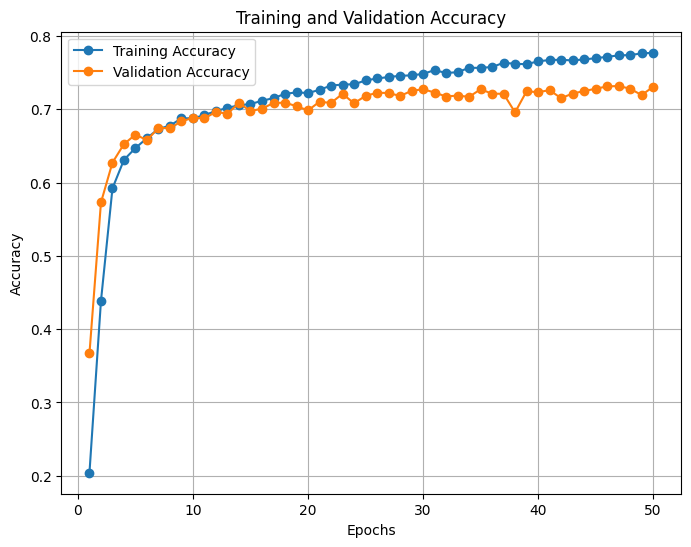

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy =history_bilstm_no_e_mob111_dropout_final.history['accuracy']
val_accuracy = history_bilstm_no_e_mob111_dropout_final.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
bilstm_mob111_dropout_final.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 2520, 300)           │      18,601,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │         140,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,029,983 (72.59 MB)

 Trainable params: 142,727 (557.53 KB)

 Non-trainable params: 18,601,800 (70.96 MB)

 Optimizer params: 285,456 (1.09 MB)

In [ ]:
import numpy as np

# Get the epoch with the highest validation accuracy
best_epoch1 = np.argmax(history_bilstm_no_e_mob111_dropout_final.history['val_accuracy']) + 1  # Adding 1 since epochs start from 1
best_val_acc1 = np.max(history_bilstm_no_e_mob111_dropout_final.history['val_accuracy'])

print(f"Best epoch: {best_epoch1}, Best validation accuracy: {best_val_acc1:.4f}")

# Get predictions (probabilities)
y_pred_probs2 = bilstm_mob111_dropout_final .predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs2, axis=1)  # Assuming one-hot encoded output

# Convert y_test from one-hot to class labels
y_true = np.argmax(y_test, axis=1)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [ ]:
import numpy as np

# Get the epoch with the highest validation accuracy
best_epoch1 = np.argmax(history_bilstm_no_e_mob111_dropout_final.history['val_accuracy']) + 1  # Adding 1 since epochs start from 1
best_val_acc1 = np.max(history_bilstm_no_e_mob111_dropout_final.history['val_accuracy'])

print(f"Best epoch: {best_epoch1}, Best validation accuracy: {best_val_acc1:.4f}")

Best epoch: 47, Best validation accuracy: 0.7318


In [ ]:
# Get predictions (probabilities)
y_pred_probs2 = bilstm_mob111_dropout_final .predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs2, axis=1)  # Assuming one-hot encoded output

# Convert y_test from one-hot to class labels
y_true = np.argmax(y_test, axis=1)

330/330 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Accuracy: 0.7322
Precision: 0.7527
Recall: 0.7322
F1 Score: 0.7369

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       768
           1       0.69      0.78      0.73       556
           2       0.73      0.59      0.65      3081
           3       0.94      0.86      0.90      3269
           4       0.45      0.68      0.54       215
           5       0.45      0.67      0.54       517
           6       0.61      0.72      0.66      2131

    accuracy                           0.73     10537
   macro avg       0.66      0.73      0.69     10537
weighted avg       0.75      0.73      0.74     10537

